<a href="https://colab.research.google.com/github/acekanth/hello-world/blob/master/AutoTS_Billing_20210422_Chart2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install auto_ts

In [146]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from pandas import read_csv
import pandas as pd
import numpy as np
import itertools

In [147]:
import auto_ts as AT

In [148]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [149]:
def parse(x):
  return datetime.striptime(x, '%Y-%m')

In [150]:
billing_data = read_csv('/gdrive/My Drive/AIML/CTG/2021-04-20/input-rev-pc-billed-pmo.csv',parse_dates={'time':['Year','Month']},)

In [151]:
billing_data.tail()

,time,HR_PC,Billed_PMO,Billed_Util,Revenue_USD_UOM_All,Revenue_USD_UOM_MON
70,2020-11-01,20645,16299.18333,0.789498,6.797931e+07,5.980424e+07
71,2020-12-01,20498,29727.36429,1.450257,1.285353e+08,1.090423e+08
72,2021-01-01,20802,1120.09000,0.053845,5.039028e+06,4.011121e+06
73,2021-02-01,20781,13595.20000,0.654213,5.395890e+07,4.841492e+07
74,2021-03-01,20786,19225.70000,0.924935,7.710288e+07,6.848931e+07


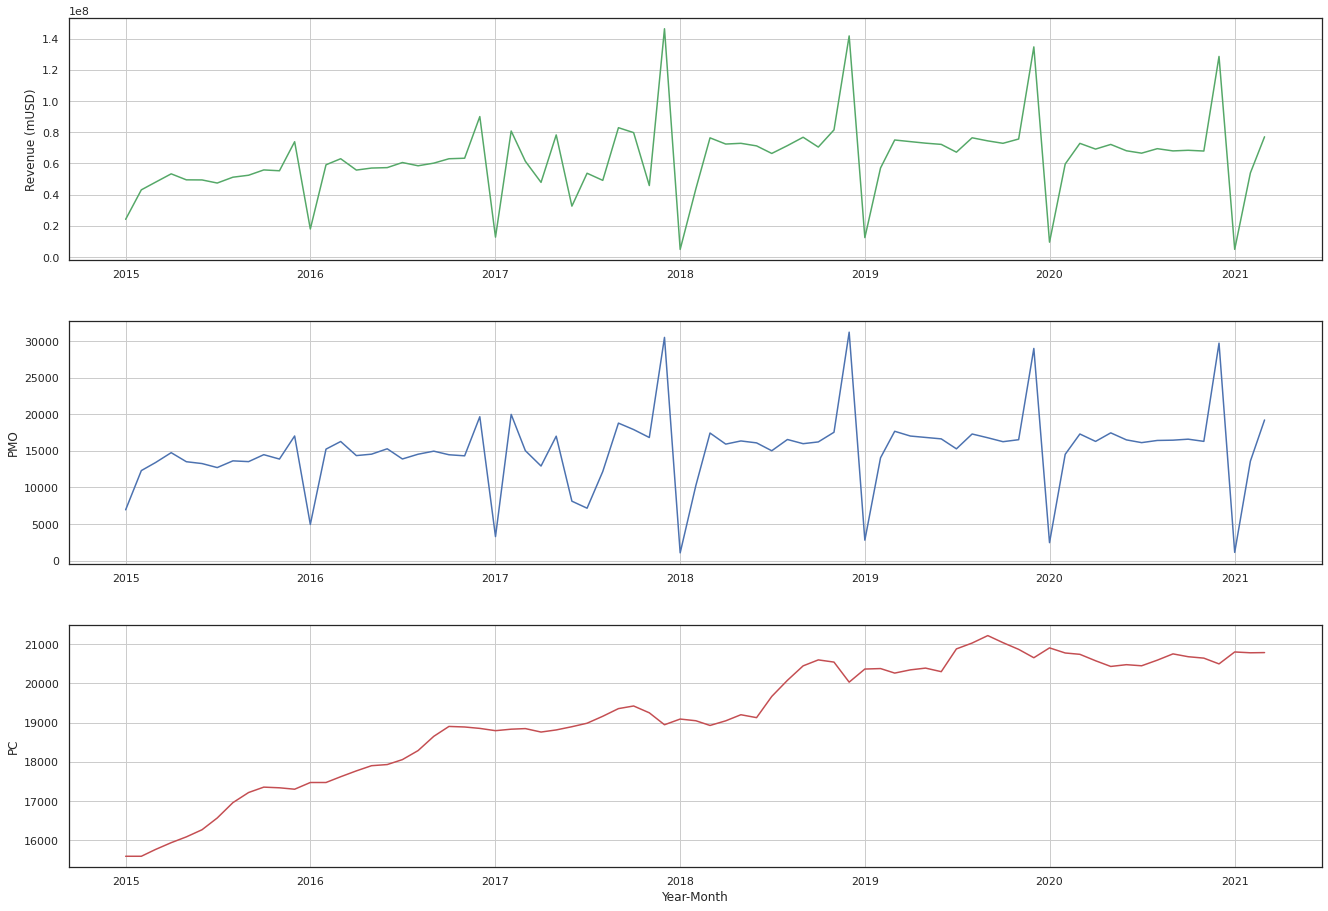

In [152]:
y1 = billing_data['Revenue_USD_UOM_All']
y2 = billing_data['Billed_PMO']
y3 = billing_data['HR_PC']
x=billing_data['time']

plt.figure(1)

plt.subplot(311)
plt.ylabel('Revenue (mUSD)')
plt.plot(x, y1,'g')
plt.grid(True)

plt.subplot(312)
plt.ylabel('PMO')
plt.plot(x, y2, 'b')
plt.grid(True)

plt.subplot(313)
plt.ylabel('PC')
plt.plot(x, y3, 'r')
plt.xlabel('Year-Month')
plt.subplots_adjust(top=3.0, bottom=0.05, left=0.10, right=3.0, hspace=0.25,wspace=0.35)
plt.grid(True)
plt.show()

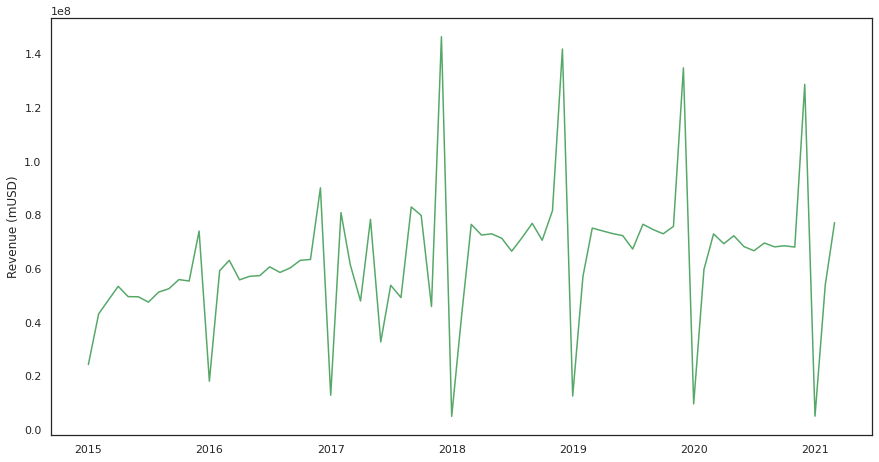

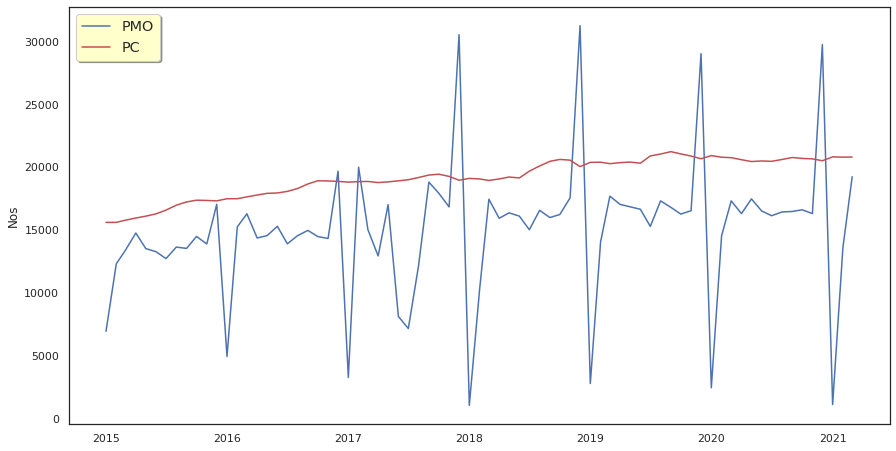

In [153]:
fig1, ax1 = plt.subplots()
ax1.plot(x, y1, 'g', label='Revenue-mUSD')
plt.subplots_adjust(top=1.5, bottom=0.05, left=0.1, right=2, hspace=0.25,wspace=0.15)
plt.ylabel('Revenue (mUSD)')
plt.show()

# Create plots with pre-defined labels.
fig, ax = plt.subplots()
ax.plot(x, y2, 'b', label='PMO')
ax.plot(x, y3, 'r', label='PC')
plt.ylabel('Nos')
legend = ax.legend(loc='upper left', shadow=True, fontsize='x-large')
plt.subplots_adjust(top=1.5, bottom=0.05, left=0.10, right=2, hspace=0.25,wspace=0.15)
legend.get_frame().set_facecolor('#FFFFCC')
plt.show()



##Train the model using data from 2015 to 2019 data

In [154]:
input_upto_2019_df = billing_data[['time','HR_PC','Billed_Util','Revenue_USD_UOM_MON']][:-15]
input_upto_2019_df

,time,HR_PC,Billed_Util,Revenue_USD_UOM_MON
0,2015-01-01,15598,0.445048,2.404260e+07
1,2015-02-01,15598,0.788808,4.278696e+07
2,2015-03-01,15771,0.849647,4.769083e+07
3,2015-04-01,15944,0.925343,5.220889e+07
4,2015-05-01,16092,0.839935,4.841551e+07
5,2015-06-01,16274,0.815075,4.786632e+07
6,2015-07-01,16573,0.767311,4.526432e+07
7,2015-08-01,16964,0.803681,4.931327e+07
8,2015-09-01,17222,0.785594,4.917460e+07
9,2015-10-01,17359,0.834149,5.341841e+07


In [155]:
ts_column = 'time'
target = 'Revenue_USD_UOM_MON'

In [156]:
ml_dict_2019 = AT.auto_timeseries(score_type='rmse',time_interval='M',
                non_seasonal_pdq=None, seasonality=True, seasonal_period=12,
                model_type=['best'],
                verbose=2)

Start of Fit.....
Running Augmented Dickey-Fuller test with paramters:
    maxlag: 31 regression: c autolag: BIC
Error: Stationary test failed. Data must be np.array. Check your input and try stationary test again
    Target variable given as = Revenue_USD_UOM_MON
Start of loading of data.....
Input is data frame. Performing Time Series Analysis
ts_column: time sep: , target: Revenue_USD_UOM_MON
    Loaded pandas dataframe...
    pandas Dataframe loaded successfully. Shape of data set = (60, 3)


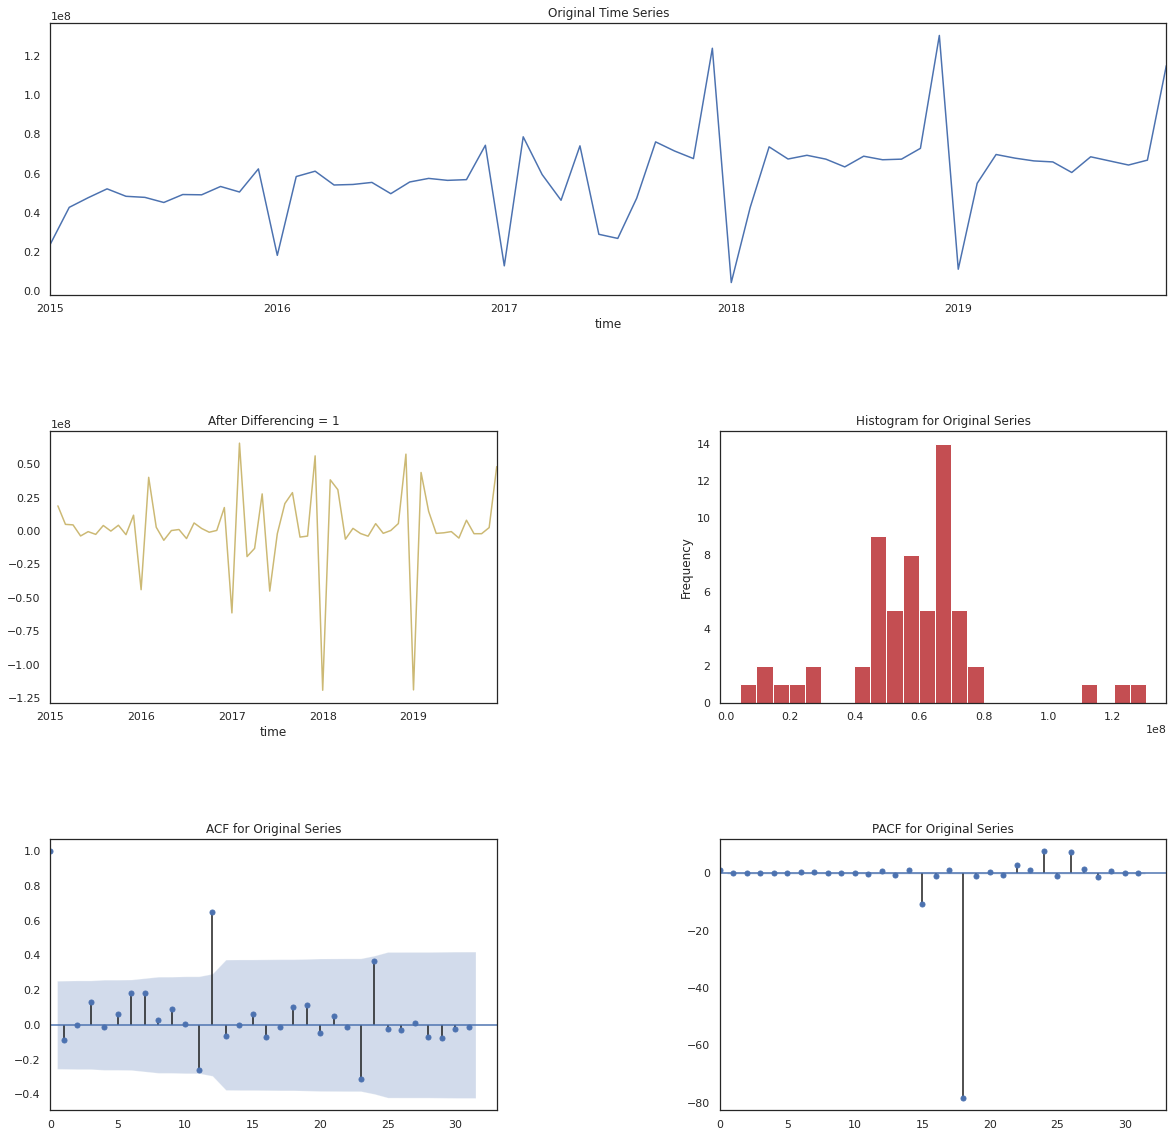

Time Interval is given as M
    Correct Time interval given as a valid Pandas date-range frequency...


Building Prophet Model



Running Facebook Prophet Model...
    Fit-Predict data (shape=(60, 4)) with Confidence Interval = 0.95...
  Starting Prophet Fit
       Adding monthly seasonality to Prophet with period=12, fourier_order=12 and prior_scale=0.10
  Starting Prophet Cross Validation
Max. iterations using expanding window cross validation = 5

Fold Number: 1 --> Train Shape: 35 Test Shape: 5
    Root Mean Squared Error predictions vs actuals = 30,839,523.64
    Std Deviation of actuals = 39,157,648.84
    Normalized RMSE = 79%
Cross Validation window: 1 completed

Fold Number: 2 --> Train Shape: 40 Test Shape: 5
    Root Mean Squared Error predictions vs actuals = 9,748,826.41
    Std Deviation of actuals = 2,081,212.37
    Normalized RMSE = 468%
Cross Validation window: 2 completed

Fold Number: 3 --> Train Shape: 45 Test Shape: 5
    Root Mean Squared Error predictions vs actu

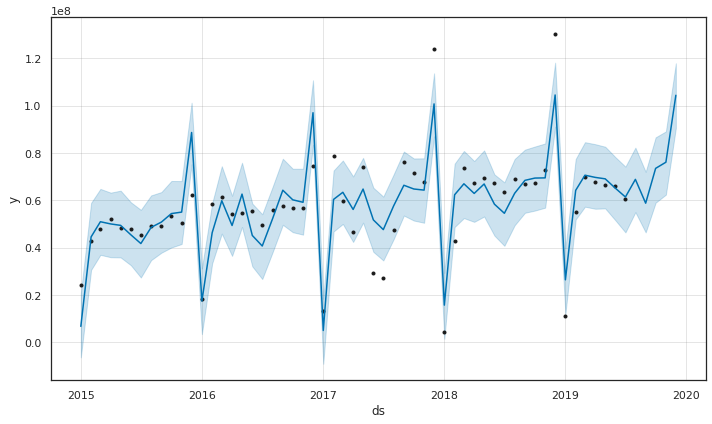

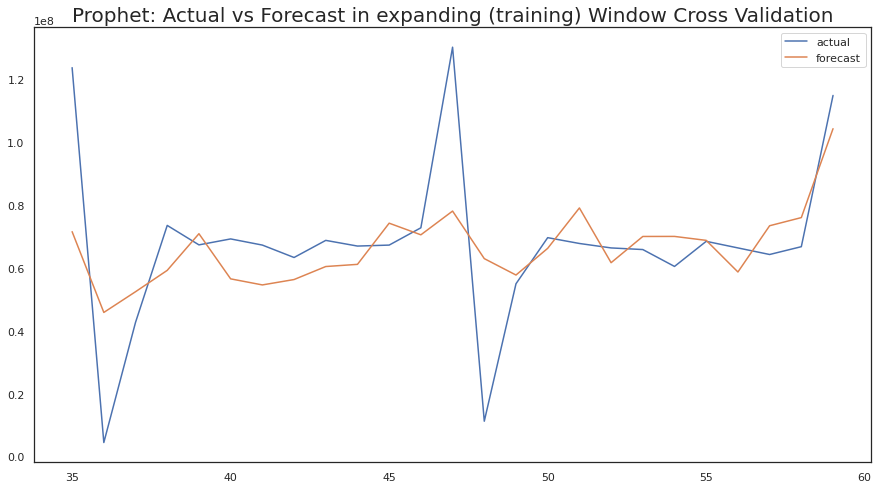

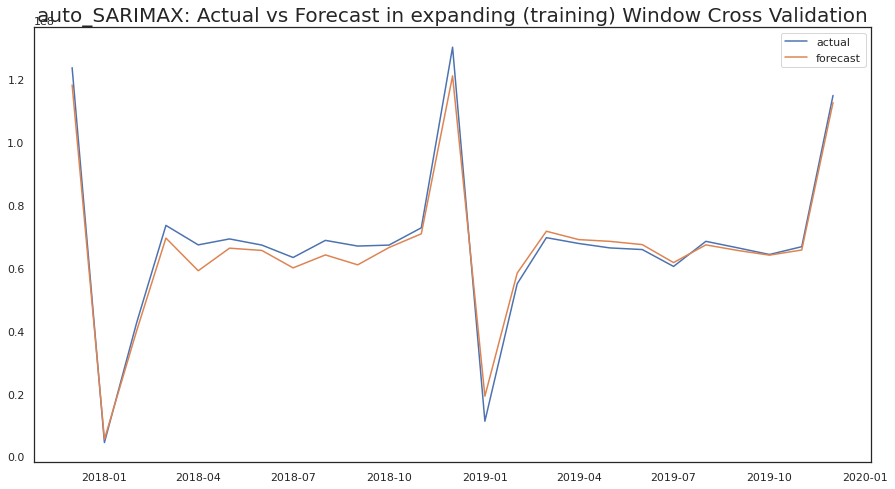

In [157]:
ml_dict_2019.fit(traindata=input_upto_2019_df, ts_column=ts_column, target=target, cv=5, sep=",")

###Provide validation data from 2020 to 2021 to get prediction

In [158]:
val_2020_2021_df = read_csv('/gdrive/My Drive/AIML/CTG/2021-04-20/val-input-rev-pc-billed-pmo-2020-2021.csv',parse_dates={'time':['Year','Month']},)
val_2020_2021_df = val_2020_2021_df[['time','HR_PC','Billed_Util','Revenue_USD_UOM_MON']]
val_2020_2021_df

,time,HR_PC,Billed_Util,Revenue_USD_UOM_MON
0,2020-01-01,20906.00000,0.117238,0
1,2020-02-01,20776.00000,0.699259,0
2,2020-03-01,20742.00000,0.834392,0
3,2020-04-01,20578.00000,0.791779,0
4,2020-05-01,20433.00000,0.854614,0
5,2020-06-01,20478.00000,0.805859,0
6,2020-07-01,20450.00000,0.788570,0
7,2020-08-01,20593.00000,0.797564,0
8,2020-09-01,20753.00000,0.793295,0
9,2020-10-01,20681.00000,0.802604,0


In [159]:
predictions_2020_2021 = ml_dict_2019.predict( testdata = val_2020_2021_df, model = 'best')
predictions_2020_2021

Revenue_USD_UOM_MON,yhat,mean_se,mean_ci_lower,mean_ci_upper
2020-01-01,1.660669e+07,2.790349e+06,1.113770e+07,2.207567e+07
2020-02-01,6.044853e+07,2.803078e+06,5.495459e+07,6.594246e+07
2020-03-01,7.091943e+07,2.803256e+06,6.542515e+07,7.641371e+07
2020-04-01,6.817787e+07,2.803258e+06,6.268358e+07,7.367215e+07
2020-05-01,7.269739e+07,2.803258e+06,6.720310e+07,7.819167e+07
2020-06-01,6.927567e+07,2.803258e+06,6.378138e+07,7.476995e+07
2020-07-01,6.848514e+07,2.803258e+06,6.299086e+07,7.397943e+07
2020-08-01,6.975714e+07,2.803258e+06,6.426286e+07,7.525143e+07
2020-09-01,6.969060e+07,2.803258e+06,6.419631e+07,7.518488e+07
2020-10-01,7.028018e+07,2.803258e+06,6.478590e+07,7.577447e+07


In [160]:
y1 = pd.concat([billing_data['Revenue_USD_UOM_MON'][:-3], pd.Series(itertools.repeat(np.nan,12))],ignore_index=True)
y2 = pd.concat([pd.Series(itertools.repeat(np.nan,5*12)),predictions_2020_2021['yhat']],ignore_index=True)
x = pd.concat([billing_data['time'][:-15],val_2020_2021_df['time']],ignore_index=True)

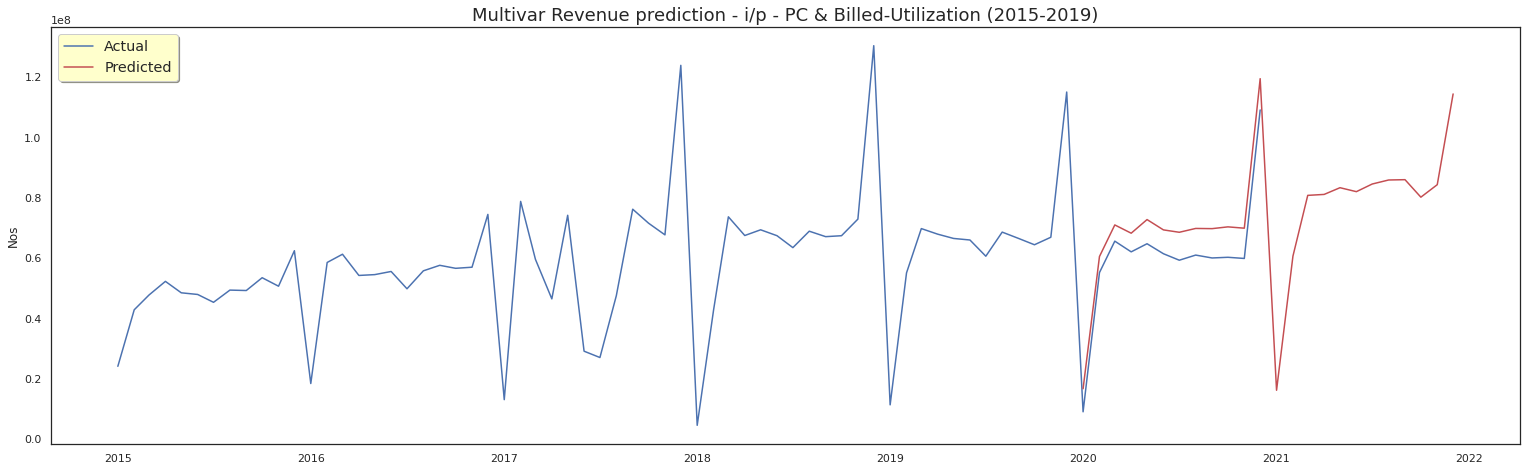

In [162]:
# Create plots with pre-defined labels.
fig, ax = plt.subplots()
ax.plot(x, y1, 'b', label='Actual')
ax.plot(x, y2, 'r', label='Predicted')
plt.ylabel('Nos')
plt.title("Multivar Revenue prediction - i/p - PC & Billed-Utilization (2015-2019)",fontdict={'fontsize':18})
legend = ax.legend(loc='upper left', shadow=True, fontsize='x-large')
plt.subplots_adjust(top=1.5, bottom=0.05, left=0.10, right=3.5, hspace=0.25,wspace=0.15)
legend.get_frame().set_facecolor('#FFFFCC')
plt.show()

In [163]:
output_multivar_2015_2019 = pd.DataFrame(zip(x,y1,y2),columns=['Date','Actual Rev(USD)','Predicted Rev(USD)'])
output_multivar_2015_2019

,Date,Actual Rev(USD),Predicted Rev(USD)
0,2015-01-01,24042595.17,NaN
1,2015-02-01,42786963.22,NaN
2,2015-03-01,47690828.00,NaN
3,2015-04-01,52208888.28,NaN
4,2015-05-01,48415513.28,NaN
...,...,...,...
79,2021-08-01,NaN,8.582084e+07
80,2021-09-01,NaN,8.592637e+07
81,2021-10-01,NaN,8.012429e+07
82,2021-11-01,NaN,8.426655e+07


In [167]:
output_multivar_2015_2019.to_csv('output_multivar_2015_2019.csv')

In [168]:
!cp output_multivar_2015_2019.csv /gdrive/My\ Drive/AIML/CTG/2021-04-20/output_multivar_2015_2019.csv

In [169]:
!ls /gdrive/My\ Drive/AIML/CTG/2021-04-20 -l

total 7142
-rw------- 1 root root  890082 Apr 20 08:09 AutoTS_Billing_20210420_13_00.ipynb
-rw------- 1 root root  856509 Apr 21 05:12 AutoTS_Billing_20210420.ipynb
-rw------- 1 root root 1632464 Apr 21 09:49 AutoTS_Billing_20210421.ipynb
-rw------- 1 root root 1969735 Apr 22 06:35 AutoTS_Billing_20210422_Chart2.ipynb
-rw------- 1 root root 1946309 Apr 22 03:39 AutoTS_Billing_20210422_Chart.ipynb
-rw------- 1 root root    4601 Apr 20 05:23 input-rev-pc-billed-pmo.csv
-rw------- 1 root root     151 Apr 21 04:31 input-rev-pc-billed-pmo.gsheet
-rw------- 1 root root    2569 Apr 22 11:26 output_multivar_2015_2019.csv
-rw------- 1 root root     792 Apr 22 11:00 predictions_2019_uni.csv
-rw------- 1 root root     443 Apr 20 08:24 predictions_2020_2021_03.csv
-rw------- 1 root root     703 Apr 22 07:55 predictions_2020_2021.csv
-rw------- 1 root root     446 Apr 20 12:33 predictions_2020_uni.csv
-rw------- 1 root root     352 Apr 22 08:03 predictions_2021.csv
-rw------- 1 root root    1085 Ap

##Train using data from 2015 to 2020 to get data for 2021

In [170]:
input_upto_2020_df = billing_data[['time','HR_PC','Billed_Util','Revenue_USD_UOM_MON']][:-3]
input_upto_2020_df

,time,HR_PC,Billed_Util,Revenue_USD_UOM_MON
0,2015-01-01,15598,0.445048,2.404260e+07
1,2015-02-01,15598,0.788808,4.278696e+07
2,2015-03-01,15771,0.849647,4.769083e+07
3,2015-04-01,15944,0.925343,5.220889e+07
4,2015-05-01,16092,0.839935,4.841551e+07
...,...,...,...,...
67,2020-08-01,20593,0.797564,6.092468e+07
68,2020-09-01,20753,0.793295,5.996792e+07
69,2020-10-01,20681,0.802604,6.019203e+07
70,2020-11-01,20645,0.789498,5.980424e+07


In [171]:
ml_dict_2020 = AT.auto_timeseries(score_type='rmse',time_interval='M',
                non_seasonal_pdq=None, seasonality=True, seasonal_period=12,
                model_type=['best'],
                verbose=2)

Start of Fit.....
Running Augmented Dickey-Fuller test with paramters:
    maxlag: 31 regression: c autolag: BIC
Results of Augmented Dickey-Fuller Test:
+-----------------------------+------------------------------+
|                             | Dickey-Fuller Augmented Test |
+-----------------------------+------------------------------+
|        Test Statistic       |     -1.3900086584300526      |
|           p-value           |      0.5870566094454989      |
|          #Lags Used         |             19.0             |
| Number of Observations Used |             52.0             |
|     Critical Value (1%)     |      -3.562878534649522      |
|     Critical Value (5%)     |      -2.918973284023669      |
|     Critical Value (10%)    |      -2.597393446745562      |
+-----------------------------+------------------------------+
 this series is non-stationary. Trying test again after differencing...
After differencing=1, results of Augmented Dickey-Fuller Test:
+-----------------

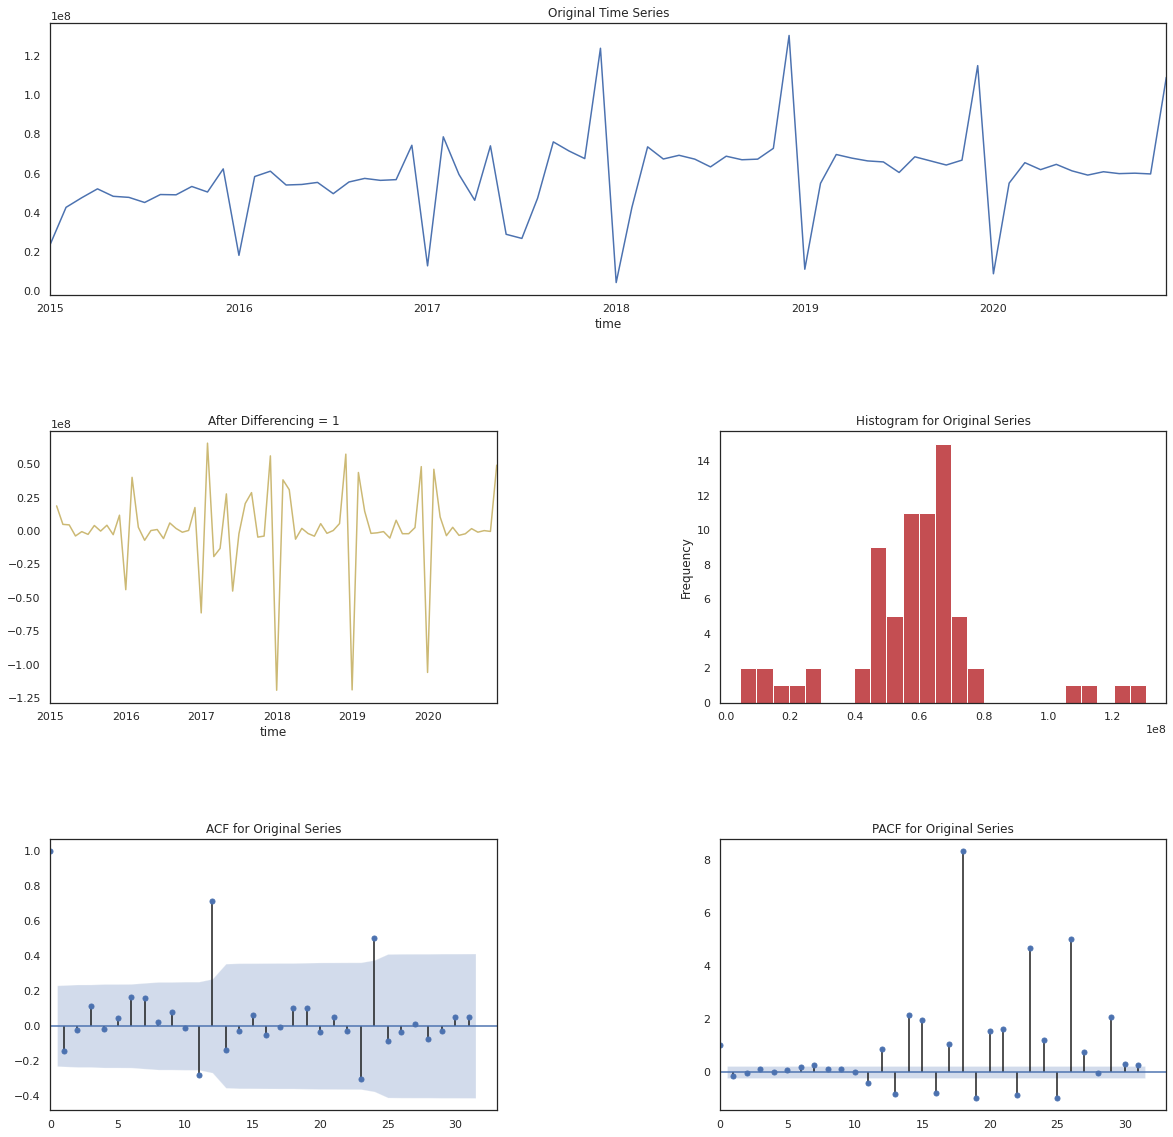

Time Interval is given as M
    Correct Time interval given as a valid Pandas date-range frequency...


Building Prophet Model



Running Facebook Prophet Model...
    Fit-Predict data (shape=(72, 4)) with Confidence Interval = 0.95...
  Starting Prophet Fit
       Adding monthly seasonality to Prophet with period=12, fourier_order=12 and prior_scale=0.10
  Starting Prophet Cross Validation
Max. iterations using expanding window cross validation = 5

Fold Number: 1 --> Train Shape: 47 Test Shape: 5
    Root Mean Squared Error predictions vs actuals = 33,205,192.70
    Std Deviation of actuals = 38,135,021.50
    Normalized RMSE = 87%
Cross Validation window: 1 completed

Fold Number: 2 --> Train Shape: 52 Test Shape: 5
    Root Mean Squared Error predictions vs actuals = 6,054,166.98
    Std Deviation of actuals = 2,671,861.59
    Normalized RMSE = 227%
Cross Validation window: 2 completed

Fold Number: 3 --> Train Shape: 57 Test Shape: 5
    Root Mean Squared Error predictions vs actu

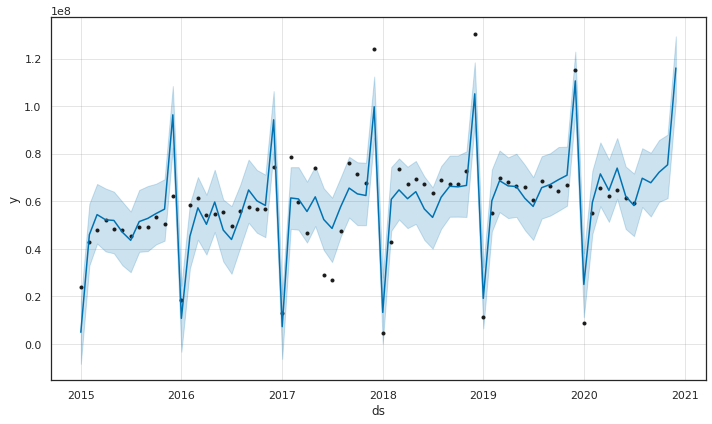

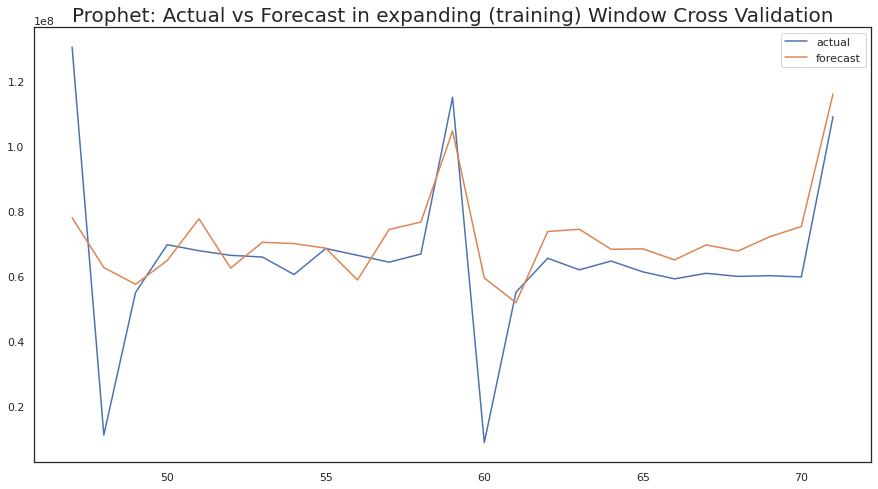

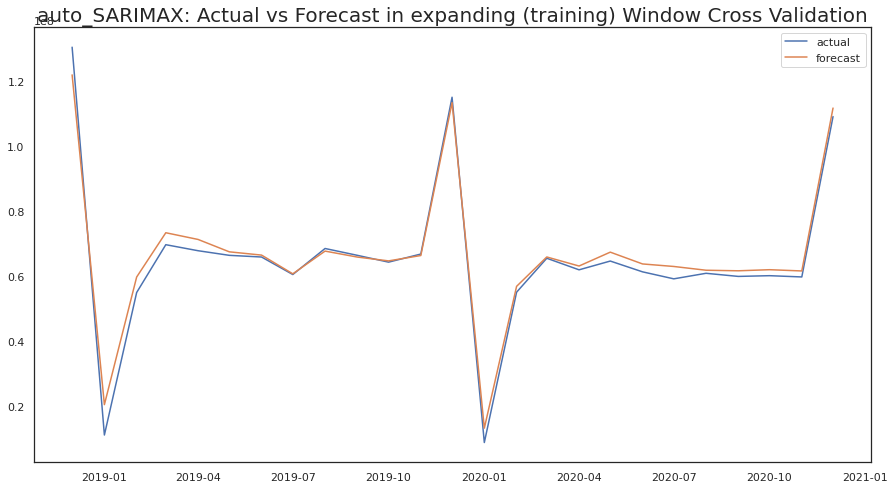

In [172]:
ml_dict_2020.fit(traindata=input_upto_2020_df, ts_column=ts_column, target=target, cv=5, sep=",")

In [173]:
val_2021_df = read_csv('/gdrive/My Drive/AIML/CTG/2021-04-20/val-input-rev-pc-billed-pmo-2021.csv',parse_dates={'time':['Year','Month']},)
val_2021_df = val_2021_df[['time','HR_PC','Billed_Util','Revenue_USD_UOM_MON']]
val_2021_df

,time,HR_PC,Billed_Util,Revenue_USD_UOM_MON
0,2021-01-01,20802.00000,0.053845,0
1,2021-02-01,20781.00000,0.654213,0
2,2021-03-01,20786.00000,0.924935,0
3,2021-04-01,20916.12182,0.924935,0
4,2021-05-01,21055.40818,0.953200,0
5,2021-06-01,20880.22333,0.932900,0
6,2021-07-01,21655.55472,0.961500,0
7,2021-08-01,21603.18781,0.975000,0
8,2021-09-01,21650.65353,0.973200,0
9,2021-10-01,21520.31300,0.892342,0


In [174]:
predictions_2021 = ml_dict_2020.predict( testdata = val_2021_df, model = 'best')
predictions_2021

Revenue_USD_UOM_MON,yhat,mean_se,mean_ci_lower,mean_ci_upper
2021-01-01,3.660306e+06,2.921952e+06,-2.066615e+06,9.387226e+06
2021-02-01,5.062186e+07,3.136170e+06,4.447508e+07,5.676864e+07
2021-03-01,7.116022e+07,3.260298e+06,6.477016e+07,7.755029e+07
2021-04-01,7.270135e+07,3.333962e+06,6.616691e+07,7.923580e+07
2021-05-01,7.222543e+07,3.378238e+06,6.560421e+07,7.884665e+07
2021-06-01,7.382958e+07,3.405042e+06,6.715582e+07,8.050334e+07
2021-07-01,7.484410e+07,3.421338e+06,6.813840e+07,8.154980e+07
2021-08-01,7.491184e+07,3.431270e+06,6.818667e+07,8.163700e+07
2021-09-01,7.336077e+07,3.437332e+06,6.662372e+07,8.009782e+07
2021-10-01,6.755622e+07,3.441035e+06,6.081191e+07,7.430052e+07


In [175]:
y1 = pd.concat([billing_data['Revenue_USD_UOM_MON'], pd.Series(itertools.repeat(np.nan,9))],ignore_index=True)
y2 = pd.concat([pd.Series(itertools.repeat(np.nan,6*12)),predictions_2021['yhat']],ignore_index=True)
x = pd.concat([billing_data['time'][:-3],val_2021_df['time']],ignore_index=True)

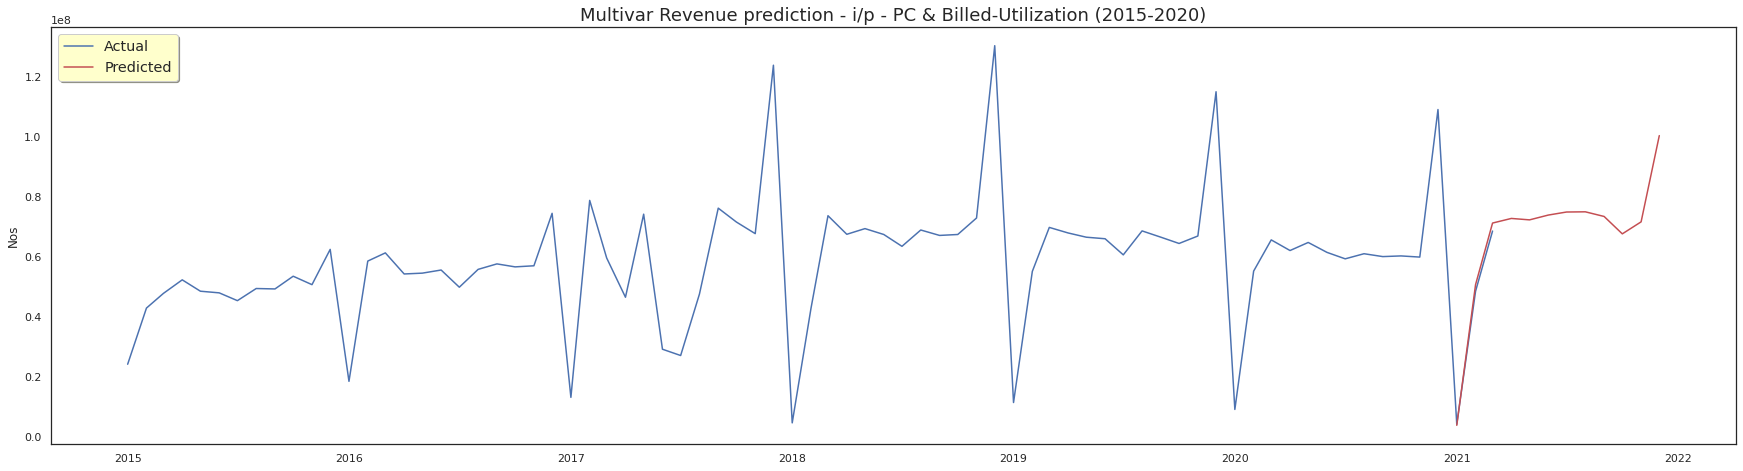

In [176]:
# Create plots with pre-defined labels.
fig, ax = plt.subplots()
ax.plot(x, y1, 'b', label='Actual')
ax.plot(x, y2, 'r', label='Predicted')
plt.ylabel('Nos')
plt.title("Multivar Revenue prediction - i/p - PC & Billed-Utilization (2015-2020)",fontdict={'fontsize':18})
legend = ax.legend(loc='upper left', shadow=True, fontsize='x-large')
plt.subplots_adjust(top=1.5, bottom=0.05, left=0.10, right=4, hspace=0.25,wspace=0.15)
legend.get_frame().set_facecolor('#FFFFCC')
plt.show()

In [177]:
output_multivar_2015_2020 = pd.DataFrame(zip(x,y1,y2),columns=['Date','Actual Rev(USD)','Predicted Rev(USD)'])
output_multivar_2015_2020

,Date,Actual Rev(USD),Predicted Rev(USD)
0,2015-01-01,24042595.17,NaN
1,2015-02-01,42786963.22,NaN
2,2015-03-01,47690828.00,NaN
3,2015-04-01,52208888.28,NaN
4,2015-05-01,48415513.28,NaN
...,...,...,...
79,2021-08-01,NaN,7.491184e+07
80,2021-09-01,NaN,7.336077e+07
81,2021-10-01,NaN,6.755622e+07
82,2021-11-01,NaN,7.156146e+07


In [178]:
output_multivar_2015_2020.to_csv('output_multivar_2015_2020.csv')

In [179]:
!cp output_multivar_2015_2020.csv /gdrive/My\ Drive/AIML/CTG/2021-04-20/output_multivar_2015_2020.csv

In [180]:
!ls /gdrive/My\ Drive/AIML/CTG/2021-04-20 -l

total 7144
-rw------- 1 root root  890082 Apr 20 08:09 AutoTS_Billing_20210420_13_00.ipynb
-rw------- 1 root root  856509 Apr 21 05:12 AutoTS_Billing_20210420.ipynb
-rw------- 1 root root 1632464 Apr 21 09:49 AutoTS_Billing_20210421.ipynb
-rw------- 1 root root 1969735 Apr 22 06:35 AutoTS_Billing_20210422_Chart2.ipynb
-rw------- 1 root root 1946309 Apr 22 03:39 AutoTS_Billing_20210422_Chart.ipynb
-rw------- 1 root root    4601 Apr 20 05:23 input-rev-pc-billed-pmo.csv
-rw------- 1 root root     151 Apr 21 04:31 input-rev-pc-billed-pmo.gsheet
-rw------- 1 root root    2569 Apr 22 11:26 output_multivar_2015_2019.csv
-rw------- 1 root root    2395 Apr 22 11:33 output_multivar_2015_2020.csv
-rw------- 1 root root     792 Apr 22 11:00 predictions_2019_uni.csv
-rw------- 1 root root     443 Apr 20 08:24 predictions_2020_2021_03.csv
-rw------- 1 root root     703 Apr 22 07:55 predictions_2020_2021.csv
-rw------- 1 root root     446 Apr 20 12:33 predictions_2020_uni.csv
-rw------- 1 root root  

##Train using only Revenue (Univariate)

In [181]:
input_upto_uni_2019_df = billing_data[['time','Revenue_USD_UOM_MON']][:-15]
input_upto_uni_2019_df

,time,Revenue_USD_UOM_MON
0,2015-01-01,2.404260e+07
1,2015-02-01,4.278696e+07
2,2015-03-01,4.769083e+07
3,2015-04-01,5.220889e+07
4,2015-05-01,4.841551e+07
5,2015-06-01,4.786632e+07
6,2015-07-01,4.526432e+07
7,2015-08-01,4.931327e+07
8,2015-09-01,4.917460e+07
9,2015-10-01,5.341841e+07


In [182]:
ml_dict_uni_2019 = AT.auto_timeseries(score_type='rmse',time_interval='M',
                non_seasonal_pdq=None, seasonality=True, seasonal_period=12,
                model_type=['best'],
                verbose=2)

Start of Fit.....
Running Augmented Dickey-Fuller test with paramters:
    maxlag: 31 regression: c autolag: BIC
Error: Stationary test failed. Data must be np.array. Check your input and try stationary test again
    Target variable given as = Revenue_USD_UOM_MON
Start of loading of data.....
Input is data frame. Performing Time Series Analysis
ts_column: time sep: , target: Revenue_USD_UOM_MON
    Loaded pandas dataframe...
    pandas Dataframe loaded successfully. Shape of data set = (60, 1)


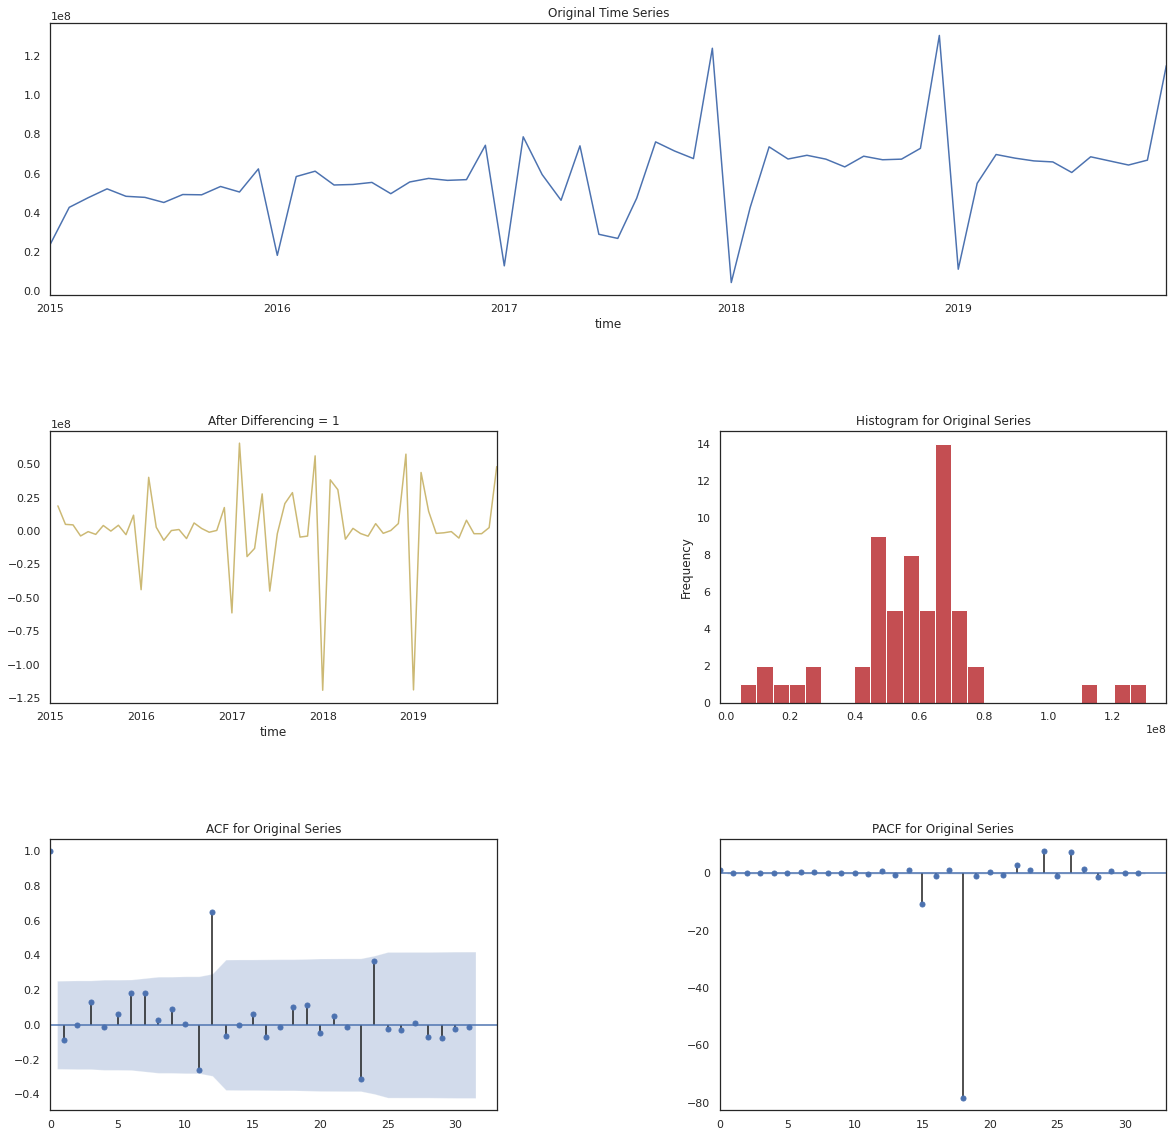

Time Interval is given as M
    Correct Time interval given as a valid Pandas date-range frequency...


Building Prophet Model



Running Facebook Prophet Model...
    Fit-Predict data (shape=(60, 2)) with Confidence Interval = 0.95...
  Starting Prophet Fit
       Adding monthly seasonality to Prophet with period=12, fourier_order=12 and prior_scale=0.10
  Starting Prophet Cross Validation
Max. iterations using expanding window cross validation = 5

Fold Number: 1 --> Train Shape: 35 Test Shape: 5
    Root Mean Squared Error predictions vs actuals = 30,839,523.64
    Std Deviation of actuals = 39,157,648.84
    Normalized RMSE = 79%
Cross Validation window: 1 completed

Fold Number: 2 --> Train Shape: 40 Test Shape: 5
    Root Mean Squared Error predictions vs actuals = 9,748,826.41
    Std Deviation of actuals = 2,081,212.37
    Normalized RMSE = 468%
Cross Validation window: 2 completed

Fold Number: 3 --> Train Shape: 45 Test Shape: 5
    Root Mean Squared Error predictions vs actu

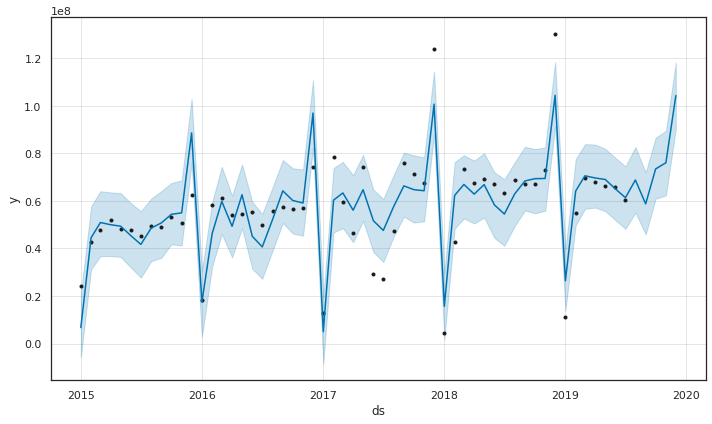

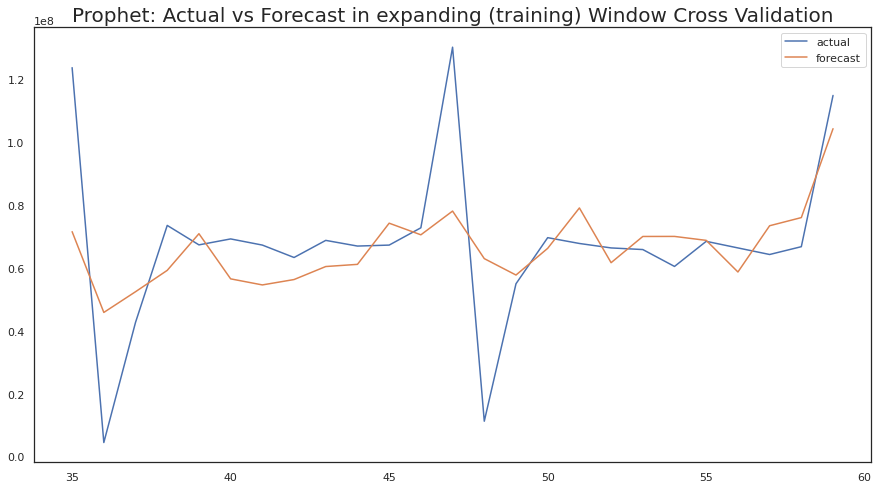

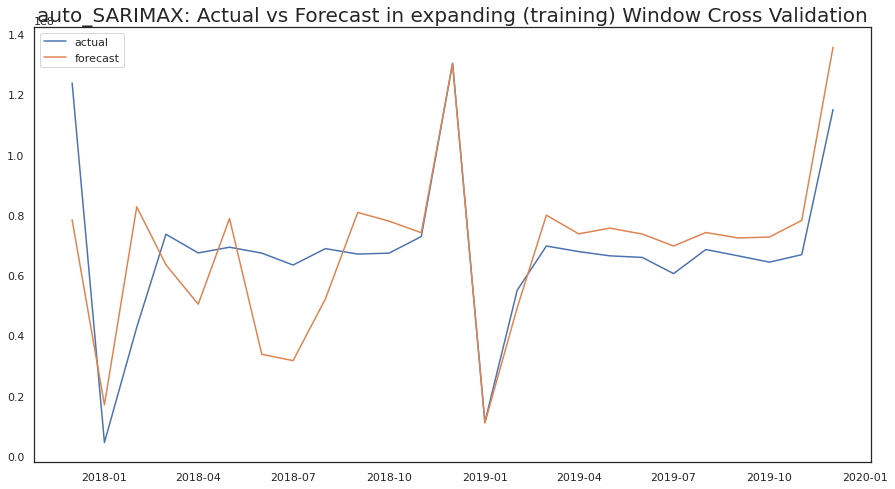

In [183]:
ml_dict_uni_2019.fit(traindata=input_upto_uni_2019_df, ts_column=ts_column, target=target, cv=5, sep=",")

In [184]:
val_2019_uni_df = read_csv('/gdrive/My Drive/AIML/CTG/2021-04-20/val-input-rev-pc-billed-pmo-2020-2021-uni.csv',parse_dates={'time':['Year','Month']},)
val_2019_uni_df

,time,Revenue_USD_UOM_All
0,2020-01-01,0
1,2020-02-01,0
2,2020-03-01,0
3,2020-04-01,0
4,2020-05-01,0
5,2020-06-01,0
6,2020-07-01,0
7,2020-08-01,0
8,2020-09-01,0
9,2020-10-01,0


In [185]:
predictions_2019 = ml_dict_uni_2019.predict( testdata = val_2019_uni_df, model = 'best')
predictions_2019

Revenue_USD_UOM_MON,yhat,mean_se,mean_ci_lower,mean_ci_upper
2020-01-01,1.059635e+07,1.520756e+07,-1.920993e+07,4.040263e+07
2020-02-01,5.421779e+07,1.520756e+07,2.441151e+07,8.402407e+07
2020-03-01,6.875979e+07,1.520756e+07,3.895351e+07,9.856606e+07
2020-04-01,6.677015e+07,1.520756e+07,3.696387e+07,9.657643e+07
2020-05-01,6.521399e+07,1.520756e+07,3.540772e+07,9.502027e+07
2020-06-01,6.455834e+07,1.520756e+07,3.475206e+07,9.436462e+07
2020-07-01,5.904296e+07,1.520756e+07,2.923669e+07,8.884924e+07
2020-08-01,6.689721e+07,1.520756e+07,3.709094e+07,9.670349e+07
2020-09-01,6.465953e+07,1.520756e+07,3.485325e+07,9.446580e+07
2020-10-01,6.242586e+07,1.520756e+07,3.261959e+07,9.223214e+07


In [186]:
y1 = pd.concat([billing_data['Revenue_USD_UOM_MON'], pd.Series(itertools.repeat(np.nan,12))],ignore_index=True)
y2 = pd.concat([pd.Series(itertools.repeat(np.nan,5*12)),predictions_2019['yhat']],ignore_index=True)
x = pd.concat([billing_data['time'],val_2019_uni_df['time'][15:]],ignore_index=True)
len(y2)

87

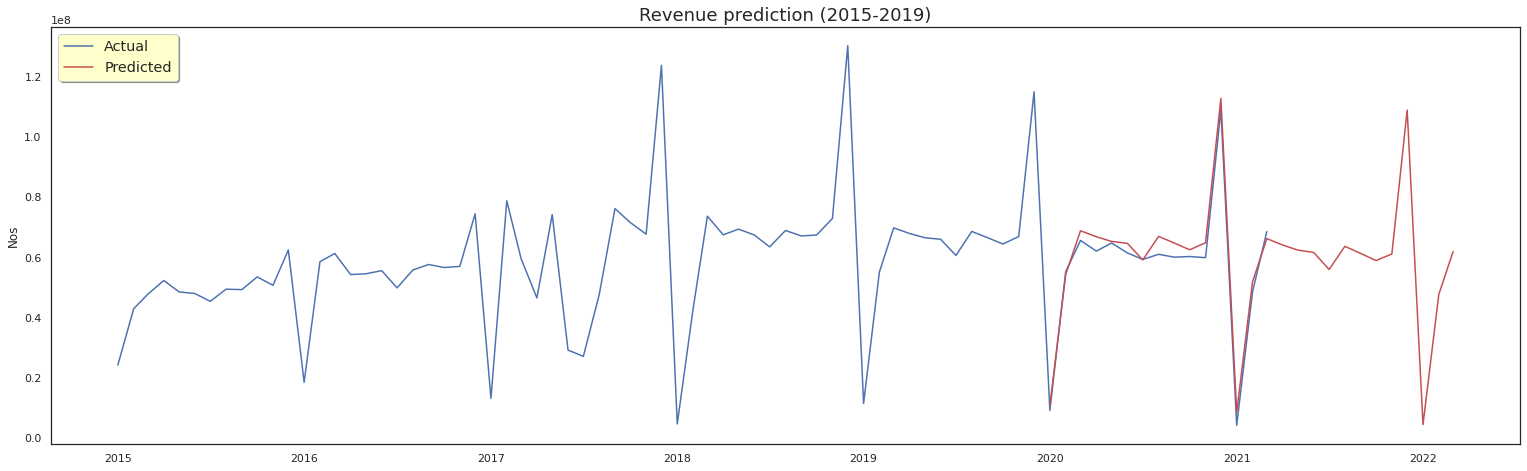

In [187]:
# Create plots with pre-defined labels.
fig, ax = plt.subplots()
ax.plot(x, y1, 'b', label='Actual')
ax.plot(x, y2, 'r', label='Predicted')
plt.ylabel('Nos')
plt.title("Revenue prediction (2015-2019)",fontdict={'fontsize':18})
legend = ax.legend(loc='upper left', shadow=True, fontsize='x-large')
plt.subplots_adjust(top=1.5, bottom=0.05, left=0.10, right=3.5, hspace=0.25,wspace=0.15)
legend.get_frame().set_facecolor('#FFFFCC')
plt.show()

In [188]:
output_univar_2015_2019 = pd.DataFrame(zip(x,y1,y2),columns=['Date','Actual Rev(USD)','Predicted Rev(USD)'])
output_univar_2015_2019

,Date,Actual Rev(USD),Predicted Rev(USD)
0,2015-01-01,24042595.17,NaN
1,2015-02-01,42786963.22,NaN
2,2015-03-01,47690828.00,NaN
3,2015-04-01,52208888.28,NaN
4,2015-05-01,48415513.28,NaN
...,...,...,...
82,2021-11-01,NaN,6.104801e+07
83,2021-12-01,NaN,1.089197e+08
84,2022-01-01,NaN,4.250689e+06
85,2022-02-01,NaN,4.759404e+07


In [189]:
output_univar_2015_2019.to_csv('output_univar_2015_2019.csv')

In [190]:
!cp predictions_2019_uni.csv /gdrive/My\ Drive/AIML/CTG/2021-04-20/output_univar_2015_2019.csv

In [191]:
!ls /gdrive/My\ Drive/AIML/CTG/2021-04-20 -l

total 7145
-rw------- 1 root root  890082 Apr 20 08:09 AutoTS_Billing_20210420_13_00.ipynb
-rw------- 1 root root  856509 Apr 21 05:12 AutoTS_Billing_20210420.ipynb
-rw------- 1 root root 1632464 Apr 21 09:49 AutoTS_Billing_20210421.ipynb
-rw------- 1 root root 1969735 Apr 22 06:35 AutoTS_Billing_20210422_Chart2.ipynb
-rw------- 1 root root 1946309 Apr 22 03:39 AutoTS_Billing_20210422_Chart.ipynb
-rw------- 1 root root    4601 Apr 20 05:23 input-rev-pc-billed-pmo.csv
-rw------- 1 root root     151 Apr 21 04:31 input-rev-pc-billed-pmo.gsheet
-rw------- 1 root root    2569 Apr 22 11:26 output_multivar_2015_2019.csv
-rw------- 1 root root    2395 Apr 22 11:33 output_multivar_2015_2020.csv
-rw------- 1 root root     792 Apr 22 11:35 output_univar_2015_2019.csv
-rw------- 1 root root     792 Apr 22 11:00 predictions_2019_uni.csv
-rw------- 1 root root     443 Apr 20 08:24 predictions_2020_2021_03.csv
-rw------- 1 root root     703 Apr 22 07:55 predictions_2020_2021.csv
-rw------- 1 root roo

In [192]:
input_upto_uni_2020_df = billing_data[['time','Revenue_USD_UOM_MON']][:-3]
input_upto_uni_2020_df

,time,Revenue_USD_UOM_MON
0,2015-01-01,2.404260e+07
1,2015-02-01,4.278696e+07
2,2015-03-01,4.769083e+07
3,2015-04-01,5.220889e+07
4,2015-05-01,4.841551e+07
...,...,...
67,2020-08-01,6.092468e+07
68,2020-09-01,5.996792e+07
69,2020-10-01,6.019203e+07
70,2020-11-01,5.980424e+07


In [193]:
ml_dict_uni_2020 = AT.auto_timeseries(score_type='rmse',time_interval='M',
                non_seasonal_pdq=None, seasonality=True, seasonal_period=12,
                model_type=['best'],
                verbose=2)

Start of Fit.....
Running Augmented Dickey-Fuller test with paramters:
    maxlag: 31 regression: c autolag: BIC
Results of Augmented Dickey-Fuller Test:
+-----------------------------+------------------------------+
|                             | Dickey-Fuller Augmented Test |
+-----------------------------+------------------------------+
|        Test Statistic       |     -1.3900086584300526      |
|           p-value           |      0.5870566094454989      |
|          #Lags Used         |             19.0             |
| Number of Observations Used |             52.0             |
|     Critical Value (1%)     |      -3.562878534649522      |
|     Critical Value (5%)     |      -2.918973284023669      |
|     Critical Value (10%)    |      -2.597393446745562      |
+-----------------------------+------------------------------+
 this series is non-stationary. Trying test again after differencing...
After differencing=1, results of Augmented Dickey-Fuller Test:
+-----------------

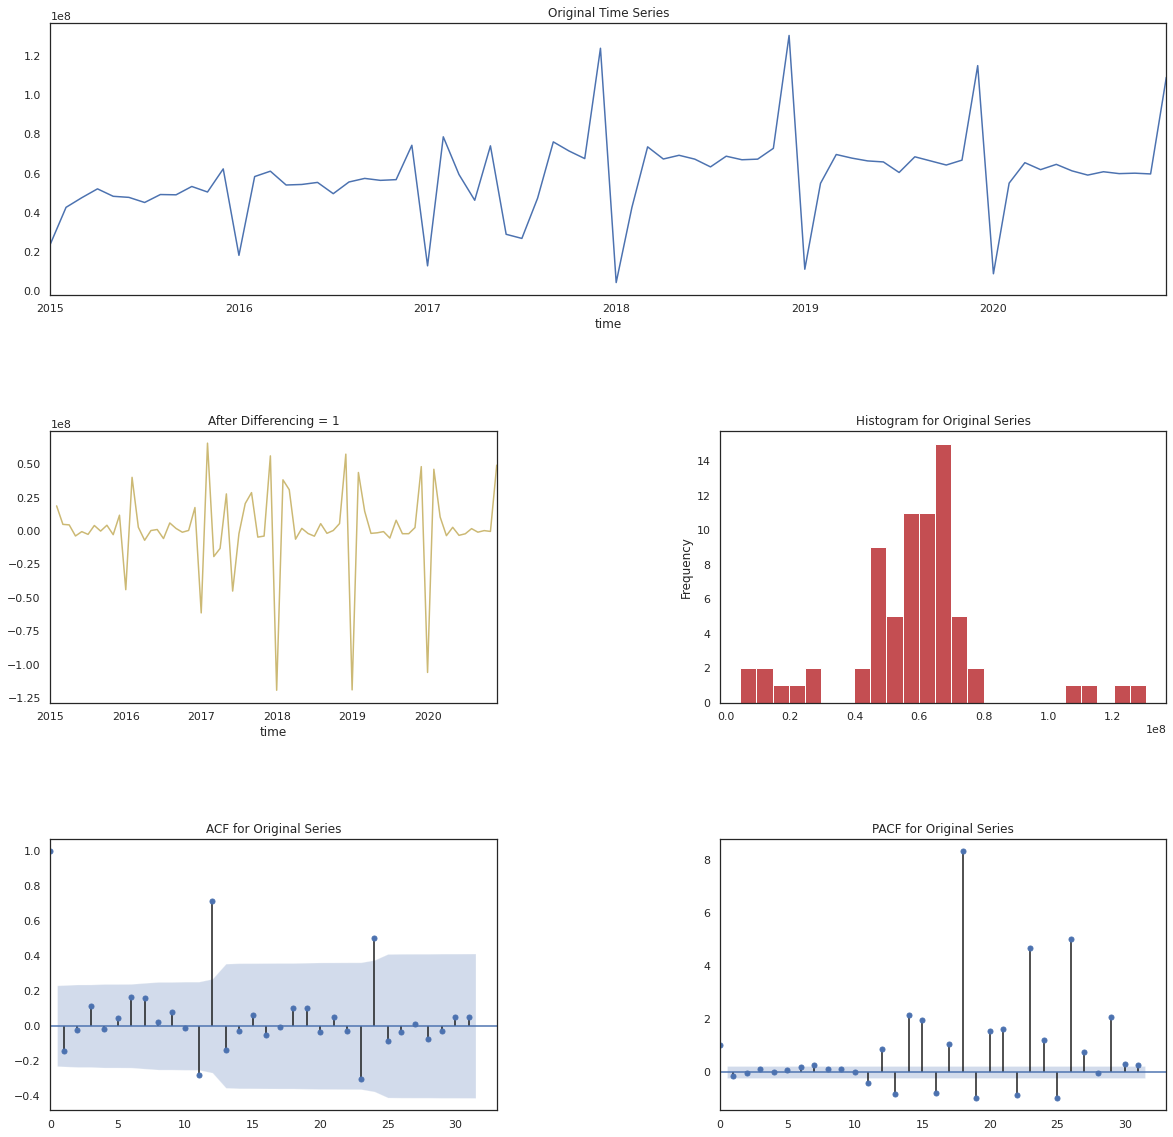

Time Interval is given as M
    Correct Time interval given as a valid Pandas date-range frequency...


Building Prophet Model



Running Facebook Prophet Model...
    Fit-Predict data (shape=(72, 2)) with Confidence Interval = 0.95...
  Starting Prophet Fit
       Adding monthly seasonality to Prophet with period=12, fourier_order=12 and prior_scale=0.10
  Starting Prophet Cross Validation
Max. iterations using expanding window cross validation = 5

Fold Number: 1 --> Train Shape: 47 Test Shape: 5
    Root Mean Squared Error predictions vs actuals = 33,205,192.70
    Std Deviation of actuals = 38,135,021.50
    Normalized RMSE = 87%
Cross Validation window: 1 completed

Fold Number: 2 --> Train Shape: 52 Test Shape: 5
    Root Mean Squared Error predictions vs actuals = 6,054,166.98
    Std Deviation of actuals = 2,671,861.59
    Normalized RMSE = 227%
Cross Validation window: 2 completed

Fold Number: 3 --> Train Shape: 57 Test Shape: 5
    Root Mean Squared Error predictions vs actu

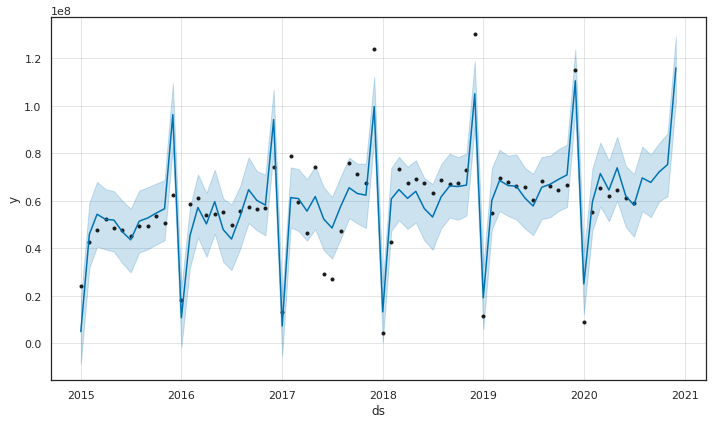

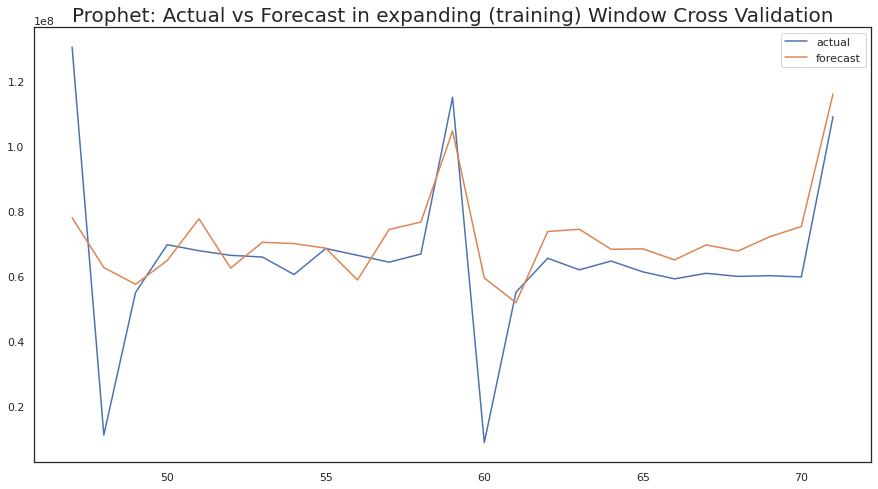

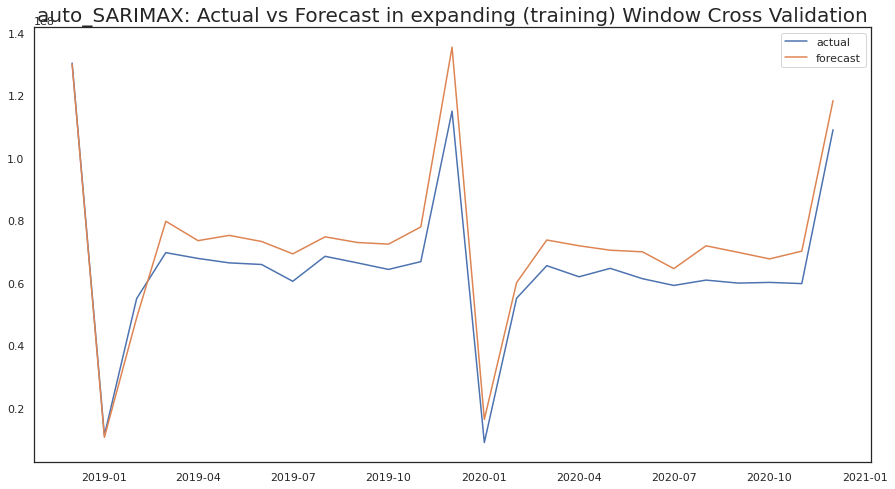

In [194]:
ml_dict_uni_2020.fit(traindata=input_upto_uni_2020_df, ts_column=ts_column, target=target, cv=5, sep=",")

In [195]:
val_2020_uni_df = read_csv('/gdrive/My Drive/AIML/CTG/2021-04-20/val-input-rev-pc-billed-pmo-2021-uni.csv',parse_dates={'time':['Year','Month']},)
val_2020_uni_df

,time,Revenue_USD_UOM_All
0,2021-01-01,0
1,2021-02-01,0
2,2021-03-01,0
3,2021-04-01,0
4,2021-05-01,0
5,2021-06-01,0
6,2021-07-01,0
7,2021-08-01,0
8,2021-09-01,0
9,2021-10-01,0


In [196]:
predictions_2020 = ml_dict_uni_2020.predict( testdata = val_2020_uni_df, model = 'best')
predictions_2020

Revenue_USD_UOM_MON,yhat,mean_se,mean_ci_lower,mean_ci_upper
2021-01-01,2.763277e+06,1.368859e+07,-2.406588e+07,2.959243e+07
2021-02-01,4.871859e+07,1.368859e+07,2.188944e+07,7.554775e+07
2021-03-01,5.892607e+07,1.368859e+07,3.209692e+07,8.575522e+07
2021-04-01,5.516477e+07,1.368859e+07,2.833562e+07,8.199392e+07
2021-05-01,5.764604e+07,1.368859e+07,3.081689e+07,8.447520e+07
2021-06-01,5.412153e+07,1.368859e+07,2.729238e+07,8.095069e+07
2021-07-01,5.176061e+07,1.368859e+07,2.493146e+07,7.858976e+07
2021-08-01,5.325322e+07,1.368859e+07,2.642406e+07,8.008237e+07
2021-09-01,5.208547e+07,1.368859e+07,2.525632e+07,7.891462e+07
2021-10-01,5.209860e+07,1.368859e+07,2.526945e+07,7.892775e+07


In [197]:
y1 = pd.concat([billing_data['Revenue_USD_UOM_MON'], pd.Series(itertools.repeat(np.nan,12))],ignore_index=True)
y2 = pd.concat([pd.Series(itertools.repeat(np.nan,6*12)),predictions_2020['yhat']],ignore_index=True)
x = pd.concat([billing_data['time'],val_2020_uni_df['time'][3:]],ignore_index=True)
len(x),len(y1),len(y2)

(87, 87, 87)

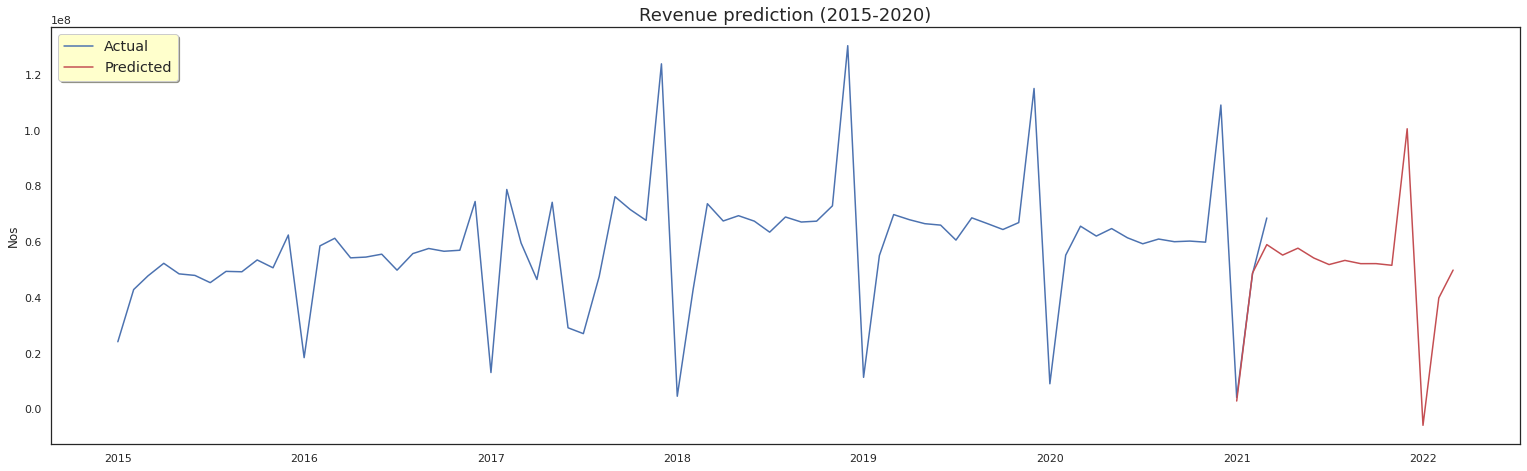

In [198]:
# Create plots with pre-defined labels.
fig, ax = plt.subplots()
ax.plot(x, y1, 'b', label='Actual')
ax.plot(x, y2, 'r', label='Predicted')
plt.ylabel('Nos')
plt.title("Revenue prediction (2015-2020)",fontdict={'fontsize':18})
legend = ax.legend(loc='upper left', shadow=True, fontsize='x-large')
plt.subplots_adjust(top=1.5, bottom=0.05, left=0.10, right=3.5, hspace=0.25,wspace=0.15)
legend.get_frame().set_facecolor('#FFFFCC')
plt.show()

In [199]:
output_univar_2015_2020 = pd.DataFrame(zip(x,y1,y2),columns=['Date','Actual Rev(USD)','Predicted Rev(USD)'])
output_univar_2015_2020

,Date,Actual Rev(USD),Predicted Rev(USD)
0,2015-01-01,24042595.17,NaN
1,2015-02-01,42786963.22,NaN
2,2015-03-01,47690828.00,NaN
3,2015-04-01,52208888.28,NaN
4,2015-05-01,48415513.28,NaN
...,...,...,...
82,2021-11-01,NaN,5.149983e+07
83,2021-12-01,NaN,1.005269e+08
84,2022-01-01,NaN,-5.963094e+06
85,2022-02-01,NaN,3.978124e+07


In [203]:
output_univar_2015_2020.to_csv('output_univar_2015_2020.csv')

In [204]:
!cp output_univar_2015_2020.csv /gdrive/My\ Drive/AIML/CTG/2021-04-20/output_univar_2015_2020.csv

In [205]:
!ls /gdrive/My\ Drive/AIML/CTG/2021-04-20 -l

total 7148
-rw------- 1 root root  890082 Apr 20 08:09 AutoTS_Billing_20210420_13_00.ipynb
-rw------- 1 root root  856509 Apr 21 05:12 AutoTS_Billing_20210420.ipynb
-rw------- 1 root root 1632464 Apr 21 09:49 AutoTS_Billing_20210421.ipynb
-rw------- 1 root root 1969735 Apr 22 06:35 AutoTS_Billing_20210422_Chart2.ipynb
-rw------- 1 root root 1946309 Apr 22 03:39 AutoTS_Billing_20210422_Chart.ipynb
-rw------- 1 root root    4601 Apr 20 05:23 input-rev-pc-billed-pmo.csv
-rw------- 1 root root     151 Apr 21 04:31 input-rev-pc-billed-pmo.gsheet
-rw------- 1 root root    2569 Apr 22 11:26 output_multivar_2015_2019.csv
-rw------- 1 root root    2395 Apr 22 11:33 output_multivar_2015_2020.csv
-rw------- 1 root root     792 Apr 22 11:35 output_univar_2015_2019.csv
-rw------- 1 root root    2501 Apr 22 11:39 output_univar_2015_2020.csv
-rw------- 1 root root     792 Apr 22 11:00 predictions_2019_uni.csv
-rw------- 1 root root     443 Apr 20 08:24 predictions_2020_2021_03.csv
-rw------- 1 root r